In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.metrics import mean_absolute_error, mean_squared_error

datetime64[ns]


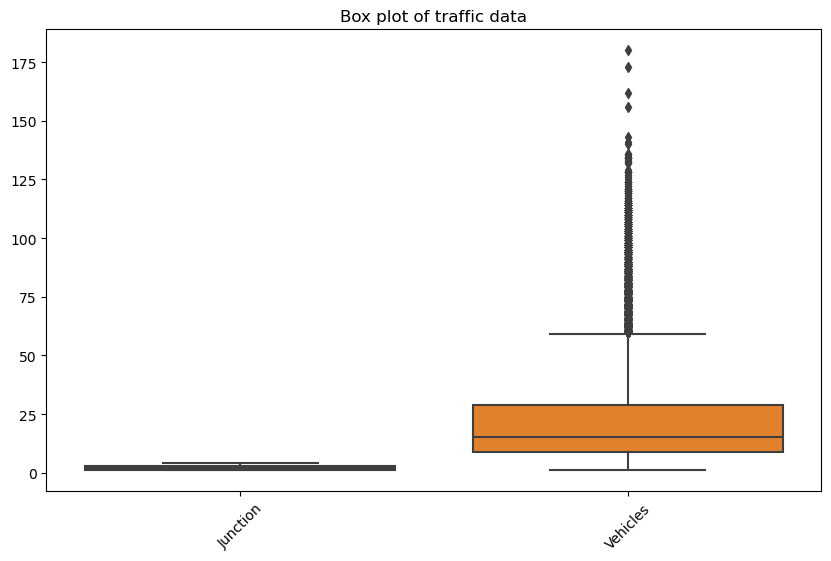

In [2]:
# Load the dataset with explicit data types
dataset_path = "C:\\Users\\admin\\Desktop\\traffic\\traffic.csv"
traffic_data = pd.read_csv(dataset_path, dtype={'DateTime': 'str', 'Junction': 'int', 'Vehicles': 'int', 'ID': 'int'})

# Convert DateTime column to datetime type
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])

# Verify the datatype of the 'DateTime' column
print(traffic_data['DateTime'].dtype)

# Add time-based features
traffic_data['Hour'] = traffic_data['DateTime'].dt.hour
traffic_data['DayOfWeek'] = traffic_data['DateTime'].dt.dayofweek
traffic_data['Month'] = traffic_data['DateTime'].dt.month

# Check for outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=traffic_data[['Junction', 'Vehicles']])
plt.title('Box plot of traffic data')
plt.xticks(rotation=45)
plt.show()

In [3]:
# Normalize/Standardize data using MinMaxScaler
scaler = MinMaxScaler()
traffic_data_normalized = scaler.fit_transform(traffic_data[['Junction', 'Vehicles', 'Hour', 'DayOfWeek', 'Month']])

# Convert normalized data back to DataFrame
traffic_data_normalized = pd.DataFrame(traffic_data_normalized, columns=['Junction', 'Vehicles', 'Hour', 'DayOfWeek', 'Month'])

# Define features (X) and target variable (y)
X = traffic_data_normalized[['Junction', 'Hour', 'DayOfWeek', 'Month']]
y = traffic_data_normalized['Vehicles']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (38496, 4) (38496,)
Testing set shape: (9624, 4) (9624,)


In [4]:
# Define the threshold for outliers
Q1 = traffic_data['Vehicles'].quantile(0.25)
Q3 = traffic_data['Vehicles'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5  
outlier_mask = (traffic_data['Vehicles'] < (Q1 - threshold * IQR)) | (traffic_data['Vehicles'] > (Q3 + threshold * IQR))
traffic_data_cleaned = traffic_data[~outlier_mask]

# Normalize/Standardize data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
traffic_data_normalized = scaler.fit_transform(traffic_data_cleaned[['Junction', 'Vehicles']])

# Convert normalized data back to DataFrame
traffic_data_normalized = pd.DataFrame(traffic_data_normalized, columns=['Junction', 'Vehicles'])

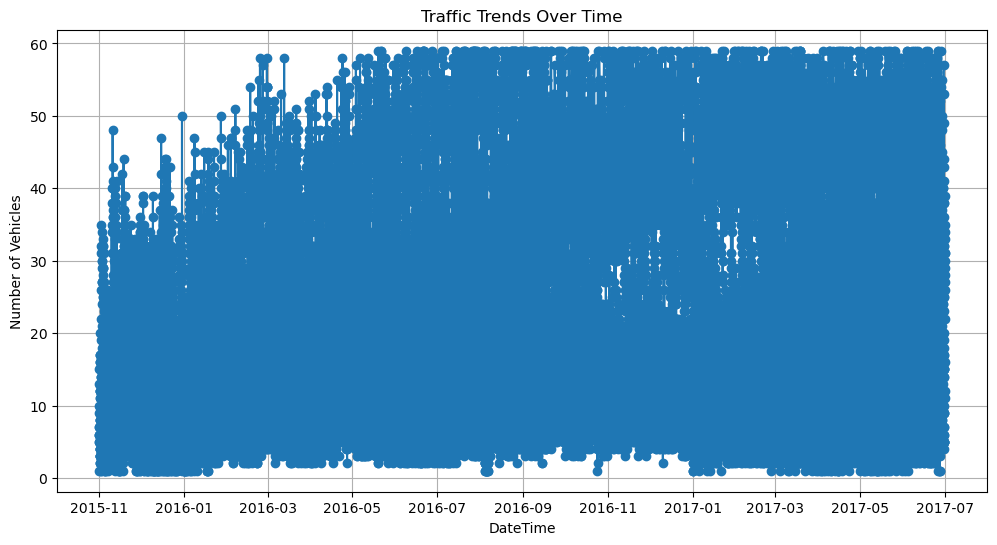

In [5]:
# Exploratory Data Analysis (EDA):
# Time Series Analysis: Visualize traffic trends over time
plt.figure(figsize=(12, 6))
plt.plot(traffic_data_cleaned['DateTime'], traffic_data_cleaned['Vehicles'], marker='o', linestyle='-')
plt.title('Traffic Trends Over Time')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()

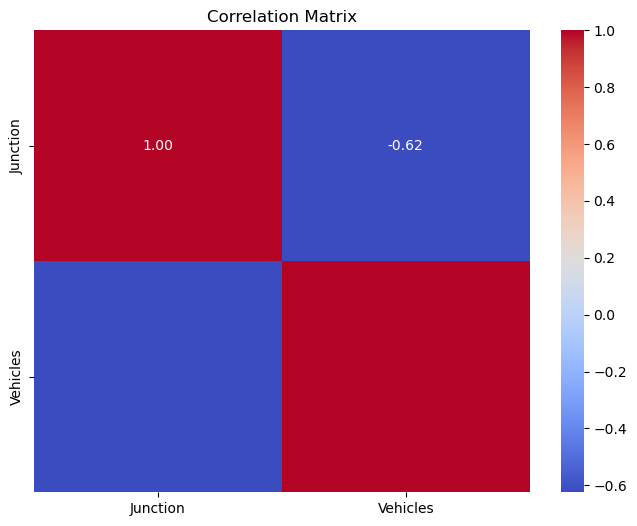

In [6]:
# Correlation Analysis:
# Calculate correlation matrix
correlation_matrix = traffic_data_cleaned[['Junction', 'Vehicles']].corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Define features (X) and target variable (y)
X = traffic_data_normalized[['Junction']]
y = traffic_data_normalized['Vehicles']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (35602, 1) (35602,)
Testing set shape: (8901, 1) (8901,)


In [8]:
# Define the degree of polynomial features
degree = 2

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Display the shapes of the new feature sets
print("Polynomial features - Training set shape:", X_train_poly.shape)
print("Polynomial features - Testing set shape:", X_test_poly.shape)

Polynomial features - Training set shape: (35602, 3)
Polynomial features - Testing set shape: (8901, 3)


In [9]:
# Define the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=1)

C:\Users\admin\me\anacondaBrowse\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
891/891 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0403 - mae: 0.1466 - val_loss: 0.0253 - val_mae: 0.1223
Epoch 2/25
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0258 - mae: 0.1224 - val_loss: 0.0259 - val_mae: 0.1267
Epoch 3/25
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0254 - mae: 0.1210 - val_loss: 0.0249 - val_mae: 0.1173
Epoch 4/25
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0256 - mae: 0.1213 - val_loss: 0.0248 - val_mae: 0.1177
Epoch 5/25
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0256 - mae: 0.1210 - val_loss: 0.0250 - val_mae: 0.1168
Epoch 6/25
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0255 - mae: 0.1209 - val_loss: 0.0260 - val_mae: 0.1170
Epoch 7/25
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0257 - mae: 0.1213 - val_loss: 0.0259 - val_mae: 0.1171
Epoch 8/25
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0255 - mae: 0.1207 - val_loss: 0.0248 - val_mae: 0.1194
Epoch 9/25
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - lo

In [11]:
# Predict values using the model
y_pred = model.predict(X_test)

# Squeeze the dimensions if necessary
y_pred = y_pred.squeeze()

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Absolute Error (MAE): 0.12175553507414752
Root Mean Squared Error (RMSE): 0.16146403686230518


C:\Users\admin\me\anacondaBrowse\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


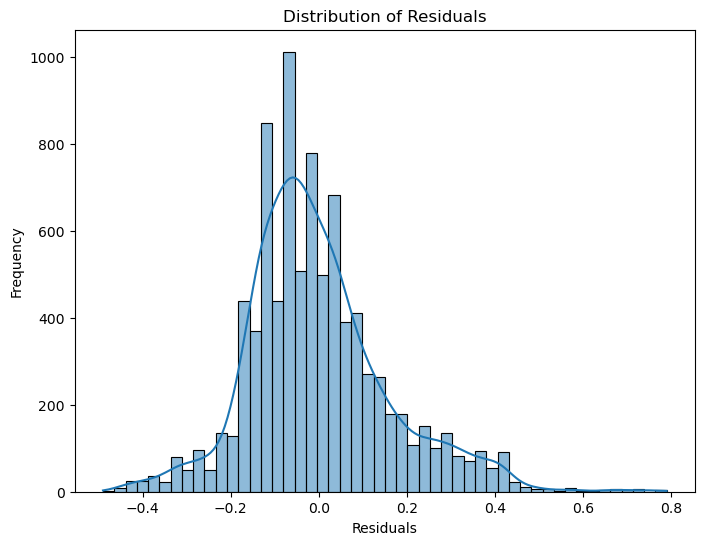

In [12]:
y_pred = y_pred.reshape(-1,) 
residuals = y_test - y_pred

# Plotting the distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()